# Лекция 6. Базовые модели обучения с учителем

# Введение

**Обучение с учителем (*Supervised learning*)** — один из разделов машинного обучения, посвященный решению следующей задачи:

$X$ — множество объектов

$Y$ — множество меток

$f : X \rightarrow Y$ — зависимость метки от объекта (именно её и надо определить)

Зависимость $f$ неизвестна

$\{s_1, s_2, \cdots, s_n \mid, s_i = (x_i, y_i)\} \subset X \times Y$ — обучающая выборка

$\{x_1, x_2, \cdots, x_n \mid x_i \in X \}$ — множество объектов

$\{y_1, y_2, \cdots, y_n \mid y_i = f(x_i) \in Y \}$ — метки, соответствующие ранее описанным объектам

Необходимо найти алгоритм $a : X \rightarrow Y$, который как можно лучше аппроксимирует $f$

# Вопросы:

- в каком виде могут быть представлены множества $X$ и $Y$?
- чем $a$ отличается от $f$?
- как можно построить алгоритм $a$?
- что значит "как можно лучше аппроксимирует"?

## Что есть объект и что есть метка?

В большинстве случаев, $x_i$ может быть описан упорядоченным набором признаков:

$x_i = (f_1, f_2, \cdots, f_m)$, где $f_i \in F_i$

Вопрос:
- что такое $F_i$?

Множество $F_i$ может быть:
- бинарным, $F_i = \{0, 1\}$. Пример: наличие у человека законченного высшего образования;
- номинальным, $\mid F_i \mid < \infty$, множество не упорядочено. Пример: любимый день недели;
- порядковым, $\mid F_i \mid < \infty$, множество упорядочено. Пример: рейтинг среди студентов по успеваемости;
- вещественным, $F_i = \mathbb{R}$. Пример: температура.

Обычно мы будет работать с матрицей "объекты-признаки":

$$F = \mid\mid f_{ij} \mid\mid_{n\times m}$$

$f_{ij}$ -- j-ый признак i-ого объекта

## Типы задач обучения с учителем

In [ ]:
from IPython.display import Image

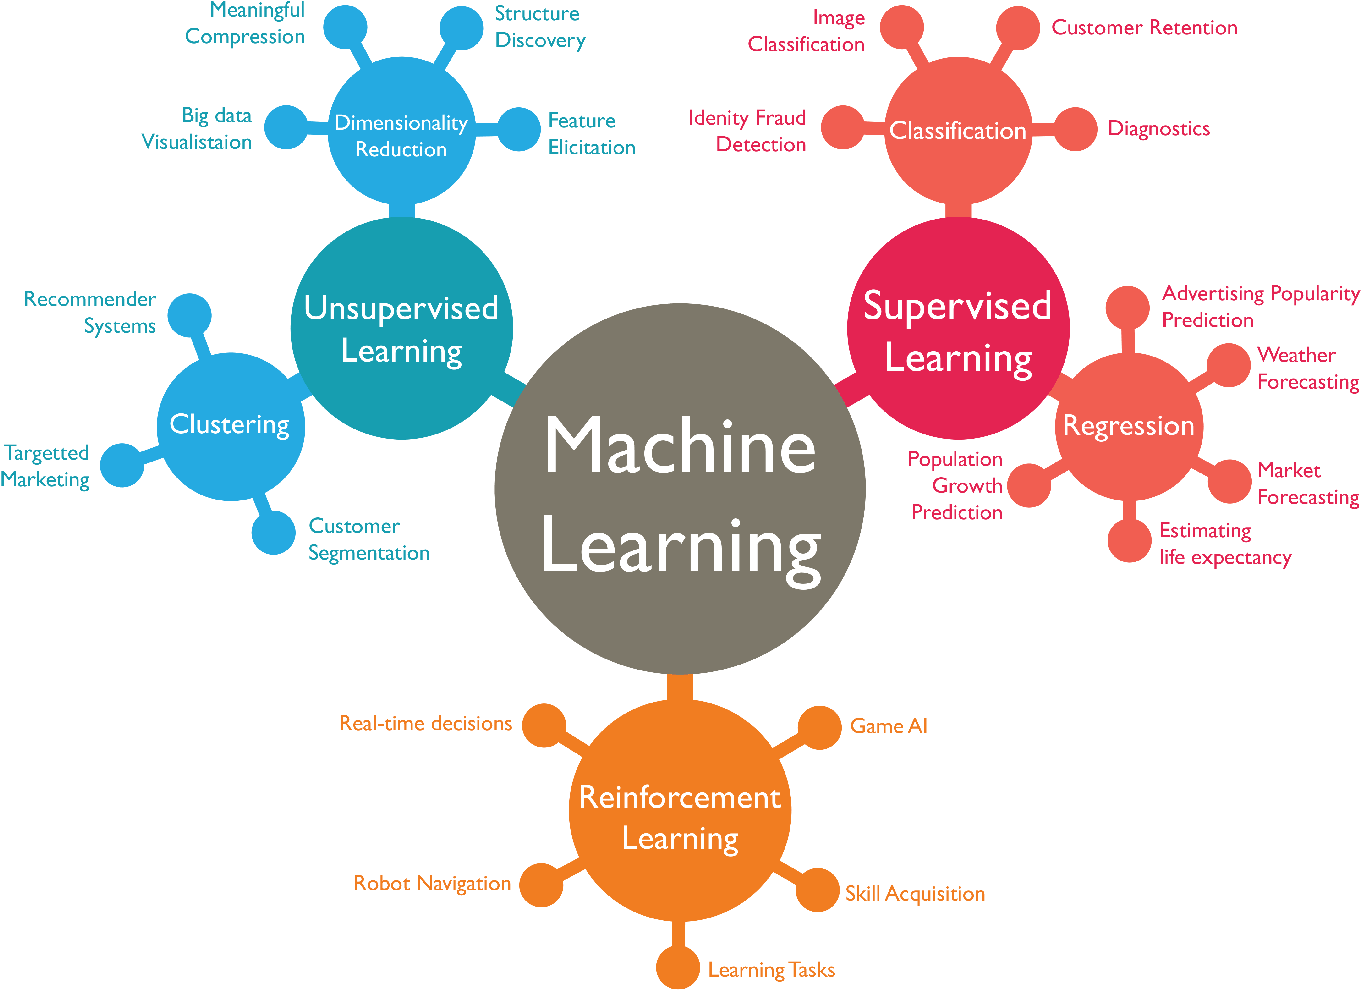

In [32]:
# Source: https://www.pngfind.com/mpng/owmimi_machine-learning-areas-hd-png-download/
Image('./machine_learning_areas.png')

## Задача классификации

Различные постановки задачи классификации:
- $Y = \{0, 1\}$, бинарная классификация. Пример: есть ли на картинке кошка?
- $Y = \{0, 1, \cdots, M\}$, многоклассовая классификация (классы не пересекаются). Пример: сколько на картинке кошек (макс. 10)?
- $Y = \{0, 1\}^{M}$, многоклассовая классификация (классы могут пересекаться). Пример: какие породы кошек есть на картинке?

## Задача регрессии

Различные постановки задачи регрессии:
- $Y = \mathbb{R}$, одномерная регрессия. Пример: предсказание роста человека;
- $Y = \mathbb{R}^{\mathbb{m}}$, многомерная регрессия. Пример: предсказание курсов нескольких валют.

# Чем отличается $a$ от $f$?

$f$ -- неизвестная зависимость, которая зачастую не может быть представлена в аналитическом виде

$a$ -- алгоритм, который в идеале должен как можно лучше аппроксимовать зависимость $f$

# Как можно построить алгоритм $a$?

В настоящий момент существует множество библиотек, в которых реализованы различные алгоритмы машинного обучения.

Большинство из них можно найти в библиотеке **scikit-learn (sklearn)**

В качестве отправной точки по выбору алгоритмов для решения той или иной задачи существует рекоммендация от вышеупомянутой библиотеки (при переходе по ссылке снизу все алгоритмы в схеме станут кликабельны):

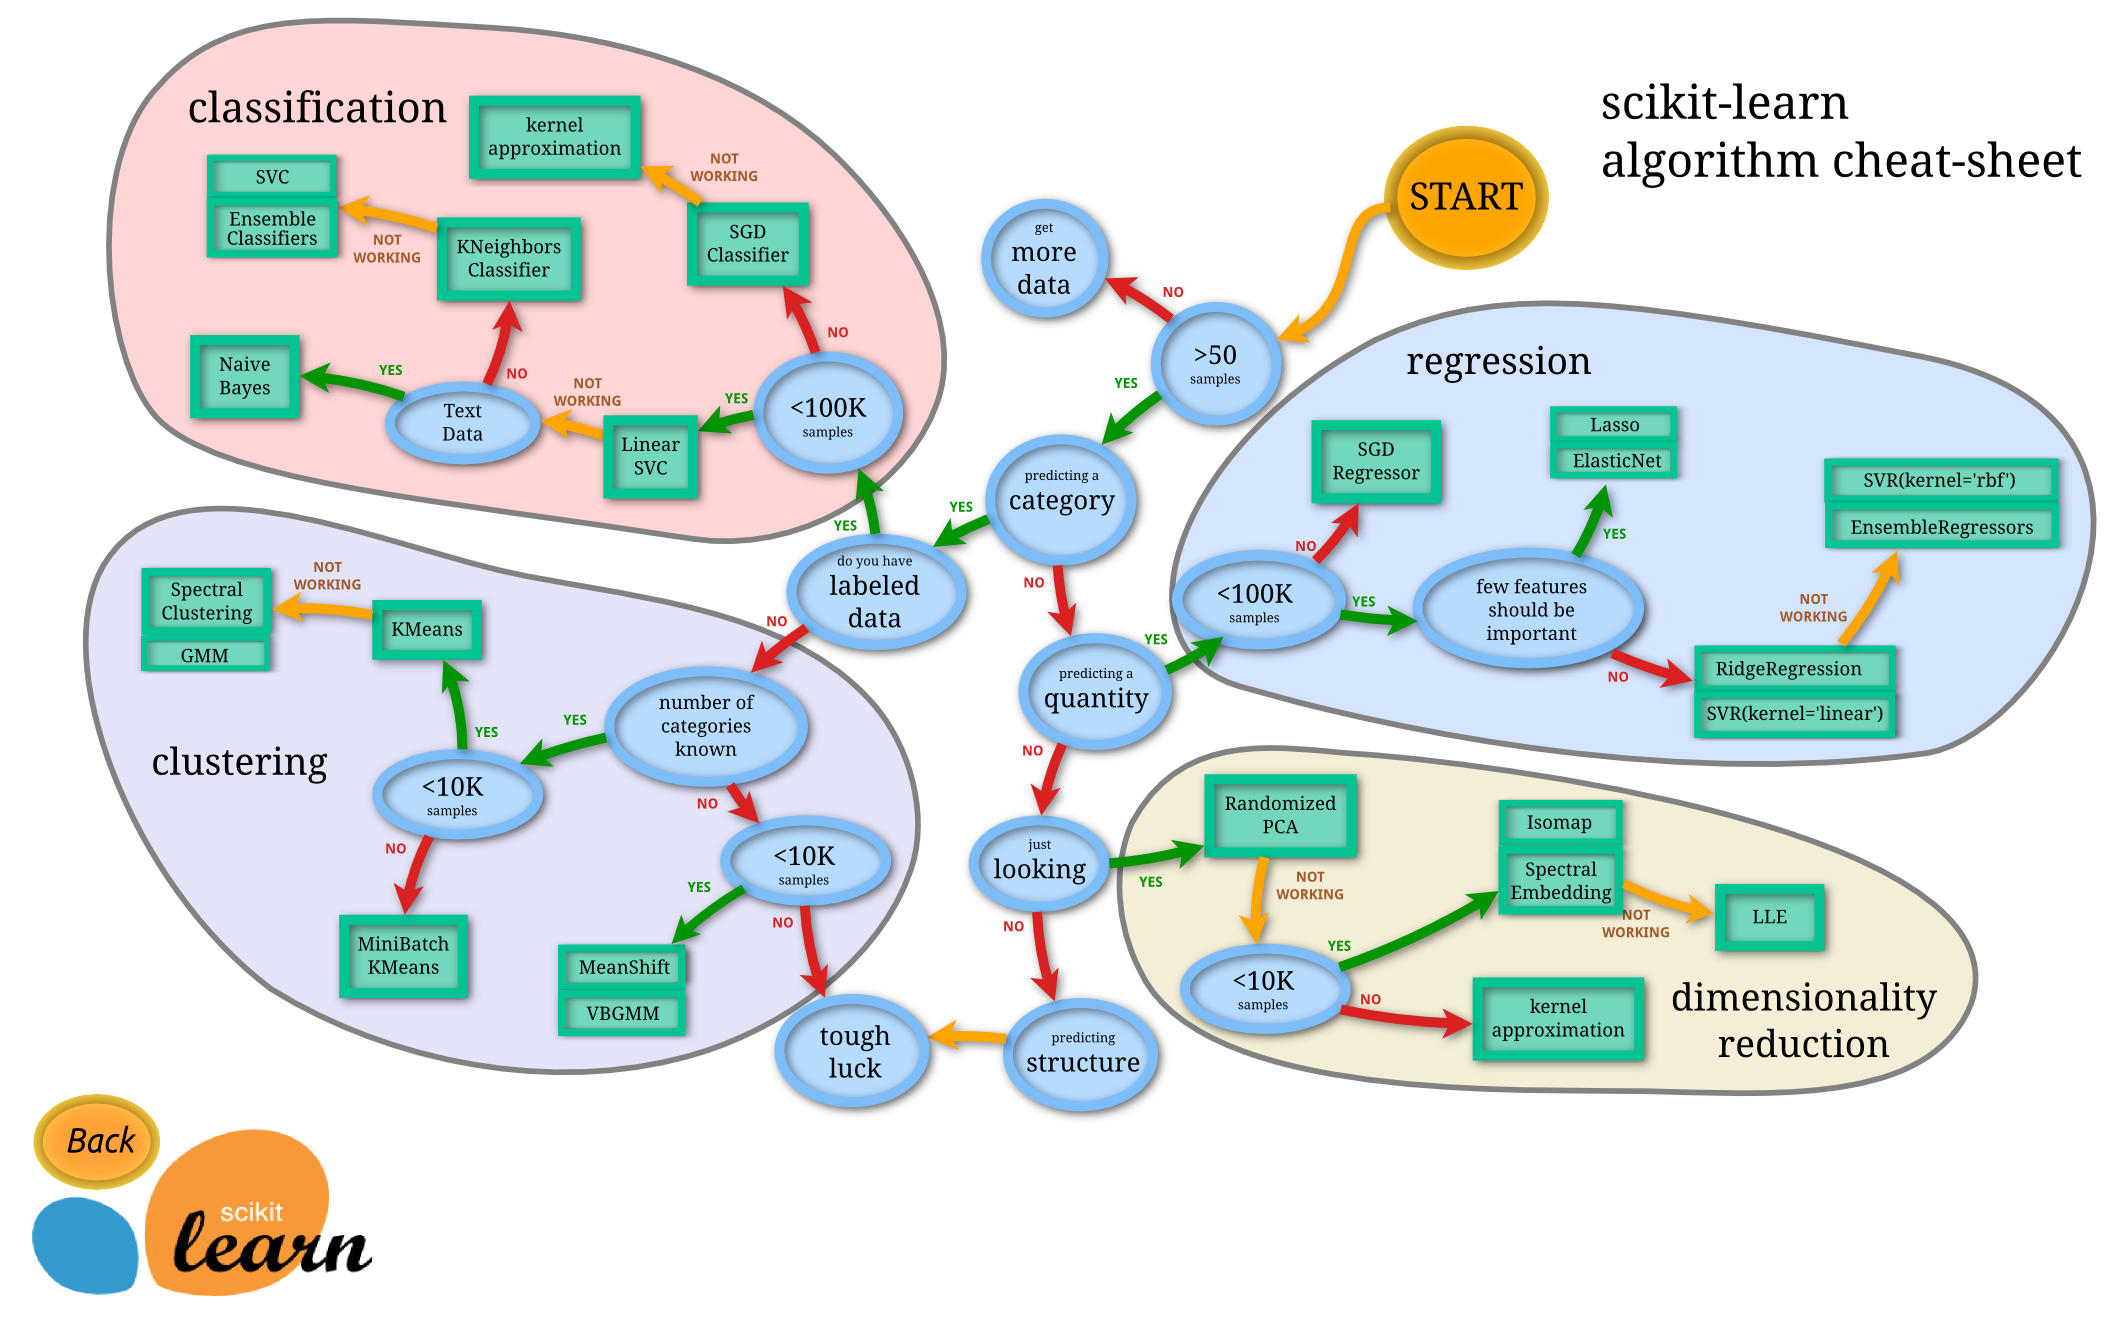

In [33]:
# Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
Image('./ml_map.png')

Стоит сказать, что данная таблица служит скорее в качестве базовой рекоммендации и не гарантирует идеального решения Вашей задачи.

# Что значит "как можно лучше аппроксимирует"?

После того, как алгоритм выбран и обучен на тренировочных данных, необходимо понять, насколько "хорошо" он работает на новых данных.

Вопрос:
- Зачем это делать?

Чтобы понять, как этот алгоритм будет вести себя в боевых условиях. Грубо говоря, необходимо проверить адекватность обощающей способности полученного решения

## Недообучение и переобучение

Рассмотрим простой пример: попробуем аппроксимировать некую заданую заранее функцию $f$ полиномами различного порядка.

In [34]:
import numpy as np

def f(x):
    """
    Функция, которую необходимо аппроксимировать алгоритмом (допустим, мы её не знаем)
    """
    return x ** 3 + 2 * (x + 4) ** 2 + 7 * (x - 5)

# Генерируем данные и делим их на тренировочные и валидационные
X = np.linspace(-10, 10, 30)
np.random.shuffle(X)

# Делим на тренировочные и тестовые данные
# В реальности для этого есть ряд других способов по разделению данных
# Но для базового примера я решил не усложнять

X_train = X[:-15]
y_train = f(X_train)

X_test = X[-15:]
y_test = f(X_test)

Взглянем на исходные данные

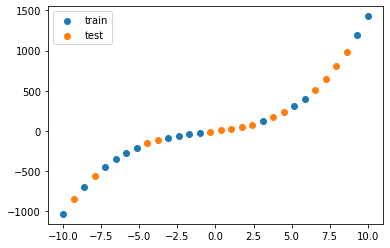

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend();

In [36]:
def get_results(x, a):
    """
    Вычисление значения метки для объектов на основе алгоритма
    """
    result = a[-1]
    for idx in range(len(a) - 1):
        result += x ** (len(a) - 1 - idx) * a[idx]
    return result

# Обучаем три различные модели: полиномы различной степени 
# Чем выше степень полинома, тем мощнее с предсказательно точки зрения считается модель

small_model = np.polyfit(X_train, y_train, 1)
medium_model = np.polyfit(X_train, y_train, 3)
large_model = np.polyfit(X_train, y_train, 14)

Рассмотрим поведение алгоритмов на тренировочных данных

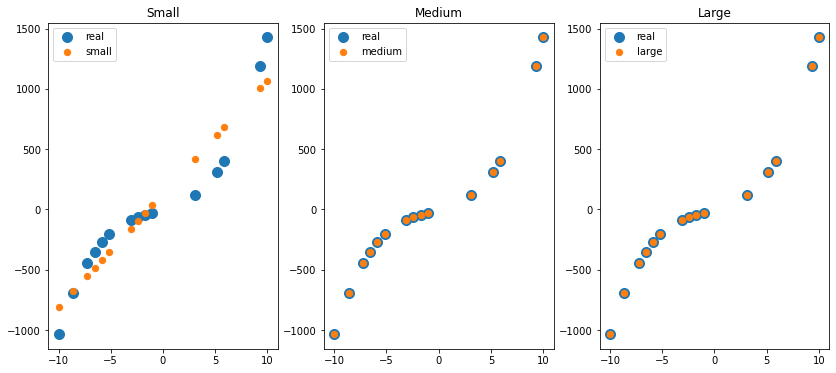

In [37]:
plt.figure(figsize=(14, 6))

ax = plt.subplot(131)
ax.set_title('Small')
ax.scatter(X_train, y_train, label='real', s=100)
ax.scatter(X_train, get_results(X_train, small_model), label='small', s=40)
ax.legend()

ax = plt.subplot(132)
ax.set_title('Medium')
ax.scatter(X_train, y_train, label='real', s=100)
ax.scatter(X_train, get_results(X_train, medium_model), label='medium', s=40)
ax.legend()

ax = plt.subplot(133)
ax.set_title('Large')
ax.scatter(X_train, y_train, label='real', s=100)
ax.scatter(X_train, get_results(X_train, large_model), label='large', s=40)
ax.legend()

In [38]:
def compute_mse(X, y, a):
    """
    Вычисление MeanSquaredError
    X - данные
    y - соответствующая им метка
    a - алгоритм
    """
    y_pred = get_results(X, a)
    return np.mean((y - y_pred) ** 2)

small_score = compute_mse(X_train, y_train, small_model)
medium_score = compute_mse(X_train, y_train, medium_model)
large_score = compute_mse(X_train, y_train, large_model)

# Выведем алгоритмы по убыванию качества их работы
leaderboard = sorted([
    ('Small', small_score),
    ('Medium', medium_score),
    ('Large', large_score)
], key=lambda pair: pair[1])

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. Medium: 1.0742055682284756e-25
2. Large: 1.3367578308735698e-24
3. Small: 37547.13819906743


На тренировочных данных самая мощная и средняя модели показывает наименьшую ошибку. Проверим теперь те же алгоритмы на валидационных (тестовых) данных.

Мы ожидаем получить такое же качество алгоритма, что и на тренировочном множестве. Именно результат работы на тестовом/валидационном множестве будут говорит нам, насколько "хорошо" обученный алгоритм аппроксимирует зависимость $f$

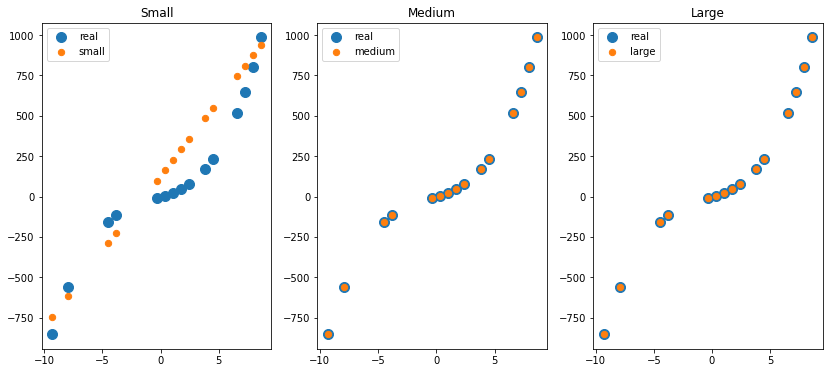

In [39]:
plt.figure(figsize=(14, 6))

ax = plt.subplot(131)
ax.set_title('Small')
ax.scatter(X_test, y_test, label='real', s=100)
ax.scatter(X_test, get_results(X_test, small_model), label='small', s=40)
ax.legend()

ax = plt.subplot(132)
ax.set_title('Medium')
ax.scatter(X_test, y_test, label='real', s=100)
ax.scatter(X_test, get_results(X_test, medium_model), label='medium', s=40)
ax.legend()

ax = plt.subplot(133)
ax.set_title('Large')
ax.scatter(X_test, y_test, label='real', s=100)
ax.scatter(X_test, get_results(X_test, large_model), label='large', s=40)
ax.legend()

In [40]:
small_score = compute_mse(X_test, y_test, small_model)
medium_score = compute_mse(X_test, y_test, medium_model)
large_score = compute_mse(X_test, y_test, large_model)

# Выведем алгоритмы по убыванию качества их работы
leaderboard = sorted([
    ('Small', small_score),
    ('Medium', medium_score),
    ('Large', large_score)
], key=lambda pair: pair[1])

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. Medium: 1.4657203909332846e-25
2. Large: 7.088891332665936e-20
3. Small: 36632.3105069042


Заметим, что теперь самая мощная модель имеет ошибку, большу чем более простая модель. Хоть в данном примере полученная разница и незначительна, но на основе этого можно сделать следующие выводы:

- чем мощнее модель, тем больше она подвержена переобучению
- в некоторых случаях, задачу можно решить не прибегая к использованию нейронных сетей и бустингов (об этом далее в курсе)
- необходимо сохранять баланс между вычислительной мощностью и сложностью модели

# Практическая  часть

Рассмотрим решения двух задач обучения с учителем: классификации и регрессии 

In [41]:
# Импорт базовых библиотек
import numpy as np
import pandas as pd

# Визуализация

import seaborn as sns
import matplotlib.pyplot as plt

# Датасеты
from sklearn.datasets import load_iris  # для классификации
from sklearn.datasets import load_boston  # для регрессии

# Utils
from sklearn.model_selection import train_test_split, cross_val_score

# Модели (классификация)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Модели (регрессия)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # для классификации
from sklearn.metrics import mean_absolute_error, mean_squared_error  # для регрессии

# Misc
from sklearn.manifold import TSNE

%matplotlib inline

# Классификация

In [42]:
# Загрузим данные
from sklearn.datasets import load_iris
data = load_iris()
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [43]:
type(data)

sklearn.utils.Bunch

In [44]:
# Явно "достанем" из данных объекты и метки

X = data.data
y = data.target

print(f'Type X: {type(X)}, X shape: {X.shape}')
print(f'Type y: {type(y)}, y shape: {y.shape}')
print(data.feature_names)

Type X: <class 'numpy.ndarray'>, X shape: (150, 4)
Type y: <class 'numpy.ndarray'>, y shape: (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [45]:
# Создадим pd.DataFrame из данных для дальнейшего анализа
import pandas as pd
full_data = np.concatenate([X, np.reshape(y, (y.shape[0], 1))], axis=1)

df = pd.DataFrame(full_data, columns=data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [46]:
# Получим информацию о типах данных и наличии/отсутствии пропусков

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [47]:
# Получим информацию по базовым статистикам для каждого признака

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


(array([0., 1., 2.]), array([50, 50, 50], dtype=int64))


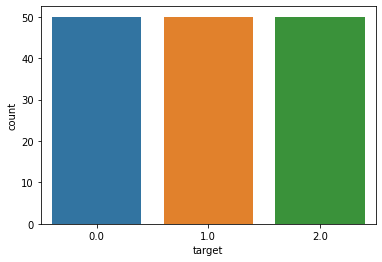

In [48]:
# Взглянем на распределение метки в данных
import seaborn as sns
print(np.unique(df.target, return_counts=True))
sns.countplot(x='target', data=df);

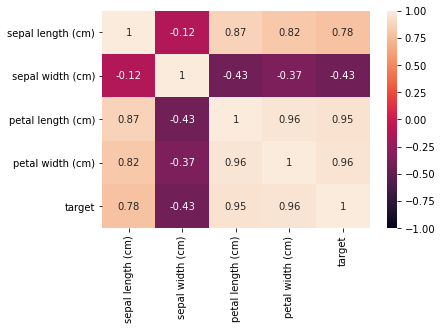

In [49]:
# Проверим признаки на их попарную корреляцию

sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

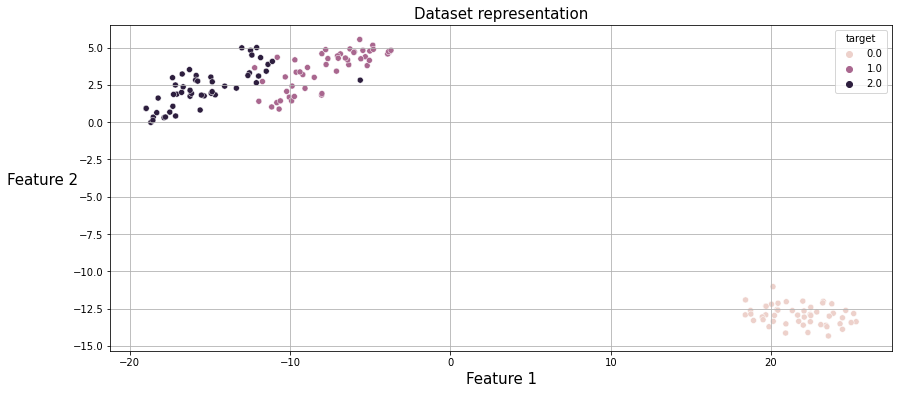

In [50]:
# Попробуем описать имеющиеся данные в пространстве меньшей размерности
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=993).fit_transform(X)
# Тут можно взять ещё LDA или PCA (так как TSNE не умеет в простой transform)

def target_to_label(target_val):
    return data.target_names[int(target_val)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))

ax.set_title('Dataset representation', fontsize=15)
ax.set_xlabel('Feature 1', fontsize=15)
ax.set_ylabel('Feature 2', rotation=0, labelpad=30, fontsize=15)
ax.grid()

sns.scatterplot(
    x=X_embedded[:, 0], 
    y=X_embedded[:, 1], 
    hue=df.target,
    ax=ax
);

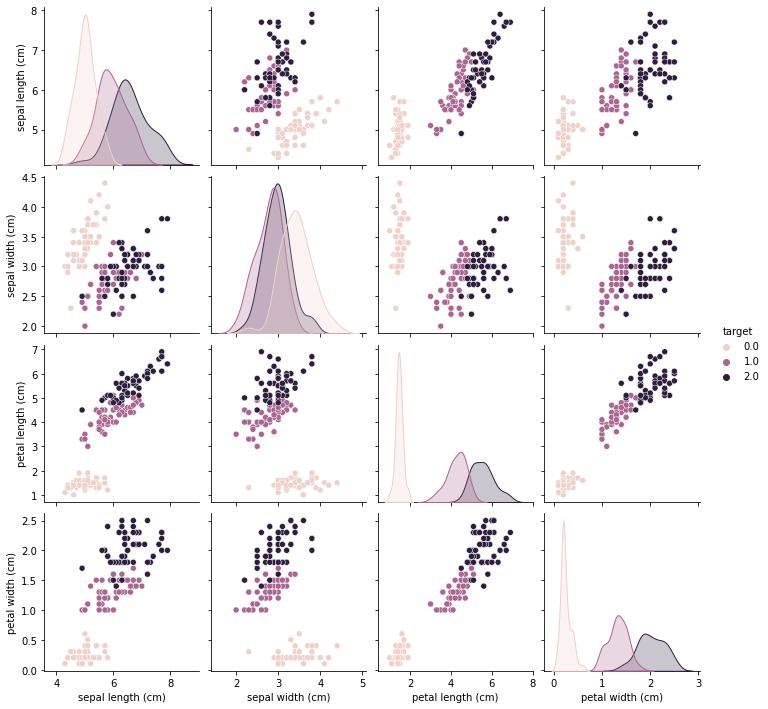

In [51]:
# Рассмотрим попарные представления данных и гистограммы для одиночных признаков

sns.pairplot(df, hue='target');

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.2)

# Так как у нас только 150 объектов в общей выборке и исходные данные имеют природу отличную от текстов,
# то имеет смысл обучить такие алгоритмы, как:
# 1) KNeighborsClassifier;
# 2) SVC;
# 3) RandomForestClassifier (один из представителей ансамблевых методов).

# Инициализируем алгоритмы с параметрами по-умолчанию
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

# Обучим классификаторы на тренировочных данных
for clf in [knn_clf, svm_clf, forest_clf]:
    clf.fit(X_train, y_train)

# Получим значение метки для тестового набора
knn_pred = knn_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
forest_pred = forest_clf.predict(X_test)

# Посчитаем метрику качества
knn_acc_score = accuracy_score(y_test, knn_pred)
svm_acc_score = accuracy_score(y_test, svm_pred)
forest_acc_score = accuracy_score(y_test, forest_pred)

# Выведем алгоритмы по убыванию качества их работы
leaderboard = sorted([
    ('KNN', knn_acc_score),
    ('SVC', svm_acc_score),
    ('Forest', forest_acc_score)
], key=lambda pair: pair[1], reverse=True)

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. KNN: 0.9666666666666667
2. SVC: 0.9666666666666667
3. Forest: 0.9333333333333333


### При многочисленном запуске предыдущей ячейки, мы можем получать различные результаты!

Как итог, мы не можем в полной мере доверять полученным результатам

Вопрос:
- как получать более стабильную информацию о качестве алгоритмов?

Ответ: использовать различные методы разбиения данных для проведения большего числа экспериментов

Примерами могут служить кросс-валидация или метод Leave-One-Out

In [61]:
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.2)

# Инициализируем алгоритмы с параметрами по-умолчанию
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

# Посчитаем метрику качества используя кросс-валидацию
knn_acc_score = cross_val_score(knn_clf, X, y, cv=7).mean()
svm_acc_score = cross_val_score(svm_clf, X, y, cv=7).mean()
forest_acc_score = cross_val_score(forest_clf, X, y, cv=7).mean()

# Выведем алгоритмы по убыванию качества их работы
leaderboard = sorted([
    ('KNN', knn_acc_score),
    ('SVC', svm_acc_score),
    ('Forest', forest_acc_score)
], key=lambda pair: pair[1], reverse=True)

print('Leaderboard:')
for idx, (leader_name, leader_score) in enumerate(leaderboard):
    print(f'{idx + 1}. {leader_name}: {leader_score}')

Leaderboard:
1. SVC: 0.9730983302411874
2. KNN: 0.9666048237476809
3. Forest: 0.9465058750773035


Теперь при повторных запусках предыдущей ячейки, оценки качества алгоритмов не будут менять свои значения так сильно